<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [31]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
boston_df.describe

<bound method NDFrame.describe of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

     

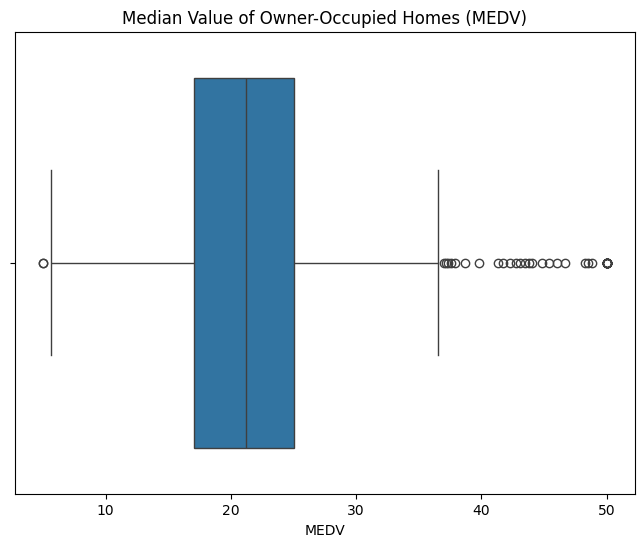

In [9]:
# Box plot for Median value of owner-occupied homes
pyplot.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Median Value of Owner-Occupied Homes (MEDV)')
pyplot.xlabel('MEDV')
pyplot.show()

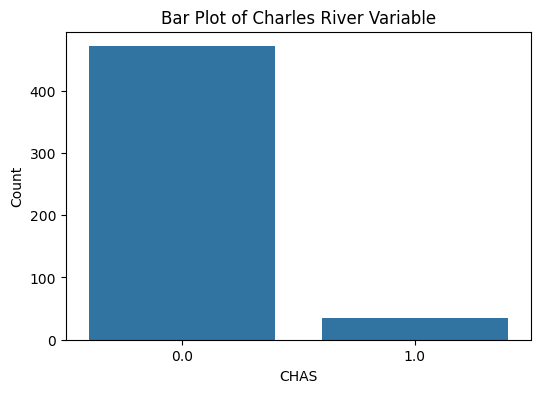

In [13]:
# Bar plot for the Charles river variable.
CHAS_counts = boston_df['CHAS'].value_counts()
pyplot.figure(figsize=(6, 4))
sns.barplot(x=CHAS_counts.index, y=CHAS_counts.values)
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('CHAS')
pyplot.ylabel('Count')
pyplot.show()

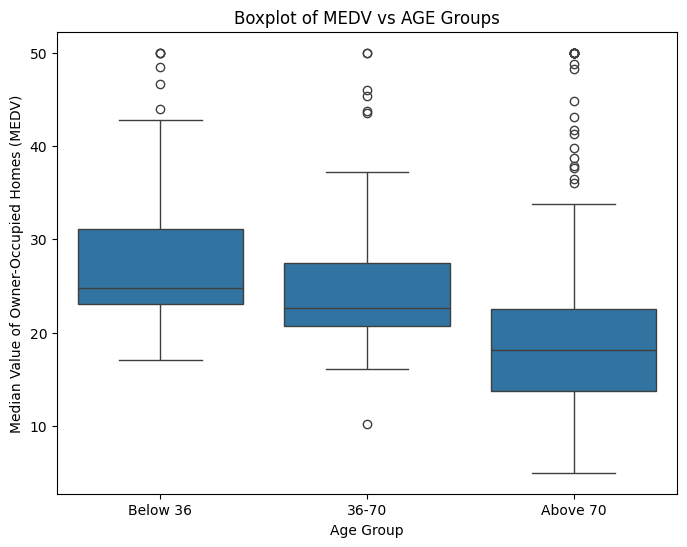

In [18]:
#Boxplot for the MEDV variable vs the AGE variable.
bins = [0, 35, 70, float('inf')]
labels = ['Below 36', '36-70', 'Above 70']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)
pyplot.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV vs AGE Groups')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
pyplot.show()

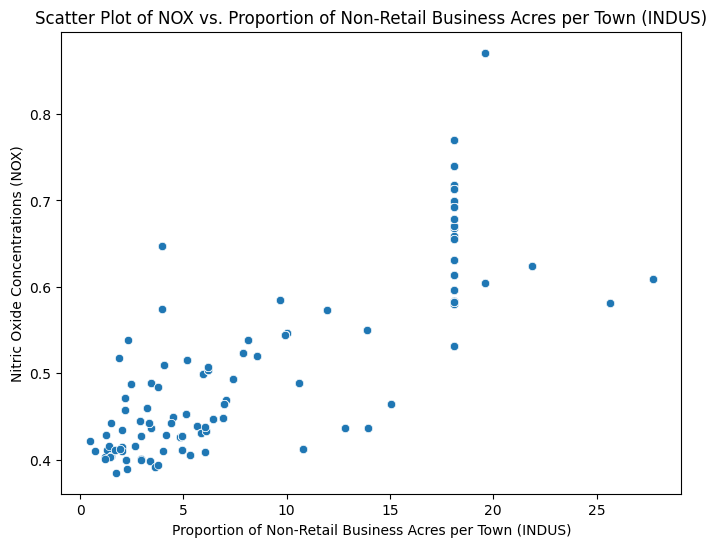

In [19]:
#Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
pyplot.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Scatter Plot of NOX vs. Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')
pyplot.show()

In [22]:
# Observation
# There might be a positive correlation between two columns when INDUS value increases, NOX is also incresing. (Bottom left to top right).
# But there is no strong positive correlation. Eventhough the INDUS value is 5, but NOX concentraion is between 0.6 and 0.7.
# And also NOX value is raising constantly at INDUS value around 18.

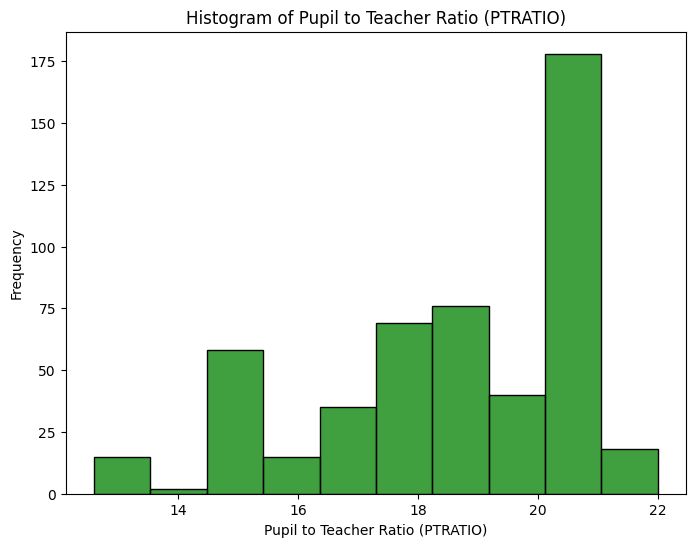

In [26]:
# Histogram for the pupil to teacher ratio variable.
pyplot.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=False, color='green')
pyplot.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil to Teacher Ratio (PTRATIO)')
pyplot.ylabel('Frequency')
pyplot.show()

In [33]:
# To find whether difference in median value of houses bounded by the Charles river or not
value_with_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
value_without_river = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(value_with_river, value_without_river)
t_stat

3.996437466090509

In [34]:
p_value

7.390623170519905e-05

In [36]:
# Since the p_value is less than 0.05, I am rejecting the null hypothesis.
# There is significant difference in the median values of houses bounded by the Charles River vs. those not bounded by it.

In [37]:
# To find difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
f_stat, p_value = stats.f_oneway(
    boston_df[boston_df['AGE_group'] == 'Below 36']['MEDV'],
    boston_df[boston_df['AGE_group'] == '36-70']['MEDV'],
    boston_df[boston_df['AGE_group'] == 'Above 70']['MEDV']
)
f_stat

36.40764999196599

In [38]:
p_value

1.7105011022702984e-15

In [39]:
# Since F_statistic is large, there is a greater difference between the age groups.
# P_value is less than 0.05, I am rejecting the null hypothesis.

In [40]:
# Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
corr_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
corr_coefficient

0.7636514469209192

In [41]:
p_value

7.913361061210442e-98

In [42]:
# Since corr_coefficient=0.76, there is a strong linear positive relationship 
# between Nitric oxide concentrations and proportion of non-retail business acres per town.
# P_value is less than 0.05, I am rejecting the null hypothesis.

In [43]:
# The impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        12:52:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model.pvalues

const    4.008955e-78
DIS      1.206612e-08
dtype: float64

In [45]:
## P_value of DIS is less than 0.05, I am rejecting the null hypothesis.